# 1. Install and Import

In [1]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe sklearn matplotlib

You should consider upgrading via the 'd:\python\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
#         Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

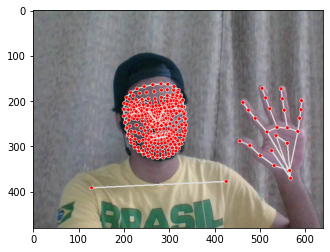

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.43093118,  0.51900786, -0.67726648, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.43093118,  0.51900786, -0.67726648, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','no','goodbye'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [25]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [31]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [32]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [85]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [86]:
label_map = {label:num for num, label in enumerate(actions)}

In [87]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'no': 3, 'goodbye': 4}

In [88]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [89]:
np.array(sequences).shape

(150, 30, 1662)

In [90]:
np.array(labels).shape

(150,)

In [91]:
X = np.array(sequences)

In [92]:
X.shape

(150, 30, 1662)

In [93]:
y = to_categorical(labels).astype(int)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [95]:
y_test.shape

(8, 5)

# 7. Build and Train LSTM Neural Network

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [97]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [119]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [100]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [101]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
5/5 [==============================] - 72s 2s/step - loss: 10.9222 - categorical_accuracy: 0.2254
Epoch 2/2000
5/5 [==============================] - 2s 466ms/step - loss: 150.2856 - categorical_accuracy: 0.2113
Epoch 3/2000
5/5 [==============================] - 2s 483ms/step - loss: 175.2853 - categorical_accuracy: 0.1831
Epoch 4/2000
5/5 [==============================] - 2s 464ms/step - loss: 121.7051 - categorical_accuracy: 0.2887
Epoch 5/2000
5/5 [==============================] - 2s 440ms/step - loss: 165.8412 - categorical_accuracy: 0.1408
Epoch 6/2000
5/5 [==============================] - 2s 467ms/step - loss: 150.5258 - categorical_accuracy: 0.2394
Epoch 7/2000
5/5 [==============================] - 3s 544ms/step - loss: 108.7613 - categorical_accuracy: 0.1620
Epoch 8/2000
5/5 [==============================] - 3s 505ms/step - loss: 209.7715 - categorical_accuracy: 0.2113
Epoch 9/2000
5/5 [==============================] - 3s 510ms/step - loss: 101.7841 - catego

5/5 [==============================] - 2s 482ms/step - loss: 1.9603 - categorical_accuracy: 0.4014
Epoch 74/2000
5/5 [==============================] - 2s 490ms/step - loss: 3.1965 - categorical_accuracy: 0.4085
Epoch 75/2000
5/5 [==============================] - 2s 490ms/step - loss: 3.5788 - categorical_accuracy: 0.2606
Epoch 76/2000
5/5 [==============================] - 3s 504ms/step - loss: 4.7323 - categorical_accuracy: 0.5070
Epoch 77/2000
5/5 [==============================] - 2s 482ms/step - loss: 2.9246 - categorical_accuracy: 0.4014
Epoch 78/2000
5/5 [==============================] - 2s 497ms/step - loss: 2.7183 - categorical_accuracy: 0.3592
Epoch 79/2000
5/5 [==============================] - 2s 496ms/step - loss: 2.3481 - categorical_accuracy: 0.3028
Epoch 80/2000
5/5 [==============================] - 3s 514ms/step - loss: 2.6353 - categorical_accuracy: 0.3732
Epoch 81/2000
5/5 [==============================] - 3s 497ms/step - loss: 4.0677 - categorical_accuracy: 0.43

5/5 [==============================] - 2s 501ms/step - loss: 1.6094 - categorical_accuracy: 0.1901
Epoch 146/2000
5/5 [==============================] - 2s 492ms/step - loss: 1.6094 - categorical_accuracy: 0.1901
Epoch 147/2000
5/5 [==============================] - 3s 501ms/step - loss: 1.6094 - categorical_accuracy: 0.1690
Epoch 148/2000
5/5 [==============================] - 3s 502ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 149/2000
5/5 [==============================] - 3s 497ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 150/2000
5/5 [==============================] - 3s 552ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 151/2000
5/5 [==============================] - 2s 493ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 152/2000
5/5 [==============================] - 2s 439ms/step - loss: 1.6094 - categorical_accuracy: 0.2042
Epoch 153/2000
5/5 [==============================] - 2s 470ms/step - loss: 1.6094 - categorical_accura

Epoch 217/2000
5/5 [==============================] - 2s 481ms/step - loss: 1.6090 - categorical_accuracy: 0.2113
Epoch 218/2000
5/5 [==============================] - 2s 500ms/step - loss: 1.6090 - categorical_accuracy: 0.2113
Epoch 219/2000
5/5 [==============================] - 3s 640ms/step - loss: 1.6090 - categorical_accuracy: 0.2113
Epoch 220/2000
5/5 [==============================] - 3s 591ms/step - loss: 1.6090 - categorical_accuracy: 0.2113
Epoch 221/2000
5/5 [==============================] - 3s 537ms/step - loss: 1.6090 - categorical_accuracy: 0.2113
Epoch 222/2000
5/5 [==============================] - 3s 600ms/step - loss: 1.6089 - categorical_accuracy: 0.2113
Epoch 223/2000
5/5 [==============================] - 2s 497ms/step - loss: 1.6089 - categorical_accuracy: 0.2113
Epoch 224/2000
5/5 [==============================] - 2s 488ms/step - loss: 1.6089 - categorical_accuracy: 0.2113
Epoch 225/2000
5/5 [==============================] - 3s 506ms/step - loss: 1.6090 - cat

5/5 [==============================] - 2s 496ms/step - loss: 1.6088 - categorical_accuracy: 0.2113
Epoch 289/2000
5/5 [==============================] - 2s 475ms/step - loss: 1.6088 - categorical_accuracy: 0.2113
Epoch 290/2000
5/5 [==============================] - 2s 482ms/step - loss: 1.6088 - categorical_accuracy: 0.2113
Epoch 291/2000
5/5 [==============================] - 2s 479ms/step - loss: 1.6088 - categorical_accuracy: 0.2113
Epoch 292/2000
5/5 [==============================] - 2s 485ms/step - loss: 1.6088 - categorical_accuracy: 0.2113
Epoch 293/2000
5/5 [==============================] - 3s 502ms/step - loss: 1.6088 - categorical_accuracy: 0.2113
Epoch 294/2000
5/5 [==============================] - 3s 497ms/step - loss: 1.6088 - categorical_accuracy: 0.2113
Epoch 295/2000
5/5 [==============================] - 2s 481ms/step - loss: 1.6087 - categorical_accuracy: 0.2113
Epoch 296/2000
5/5 [==============================] - 2s 485ms/step - loss: 1.6087 - categorical_accura

Epoch 360/2000
5/5 [==============================] - 2s 483ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 361/2000
5/5 [==============================] - 2s 476ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 362/2000
5/5 [==============================] - 2s 474ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 363/2000
5/5 [==============================] - 3s 588ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 364/2000
5/5 [==============================] - 3s 601ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 365/2000
5/5 [==============================] - 3s 548ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 366/2000
5/5 [==============================] - 2s 486ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 367/2000
5/5 [==============================] - 2s 482ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 368/2000
5/5 [==============================] - 3s 500ms/step - loss: 1.6086 - cat

5/5 [==============================] - 3s 543ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 432/2000
5/5 [==============================] - 3s 564ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 433/2000
5/5 [==============================] - 3s 552ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 434/2000
5/5 [==============================] - 3s 561ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 435/2000
5/5 [==============================] - 3s 575ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 436/2000
5/5 [==============================] - 3s 554ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 437/2000
5/5 [==============================] - 3s 492ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 438/2000
5/5 [==============================] - 3s 531ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 439/2000
5/5 [==============================] - 2s 494ms/step - loss: 1.6086 - categorical_accura

Epoch 503/2000
5/5 [==============================] - 3s 584ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 504/2000
5/5 [==============================] - 5s 964ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 505/2000
5/5 [==============================] - 4s 715ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 506/2000
5/5 [==============================] - 6s 1s/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 507/2000
5/5 [==============================] - 8s 1s/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 508/2000
5/5 [==============================] - 8s 2s/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 509/2000
5/5 [==============================] - 4s 769ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 510/2000
5/5 [==============================] - 3s 689ms/step - loss: 1.6086 - categorical_accuracy: 0.2113
Epoch 511/2000
5/5 [==============================] - 3s 612ms/step - loss: 1.6086 - categorical_

KeyboardInterrupt: 

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [103]:
res = model.predict(X_test)

In [106]:
actions[np.argmax(res[2])]

'iloveyou'

In [107]:
actions[np.argmax(y_test[5])]

'no'

# 9. Save Weights

In [108]:
model.save('action.h5')

In [76]:
#del model

In [120]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [121]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [122]:
yhat = model.predict(X_test)

In [123]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [124]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 7],
        [0, 1]],

       [[7, 0],
        [1, 0]],

       [[5, 0],
        [3, 0]],

       [[5, 0],
        [3, 0]]], dtype=int64)

In [125]:
accuracy_score(ytrue, yhat)

0.125

# 11. Test in Real Time

In [126]:
from scipy import stats

In [127]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [128]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [64]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.S